# Inbound Call Volume in a  Call Center using Time Series Forcasting 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import os
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
sns.set(rc={'figure.figsize':(20,10)})
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import plotly.express as px
import plotly.io as pio; pio.renderers.default='notebook'
import pmdarima  
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [5]:
df= pd.read_excel('Revised Volume Data.xls' , sheet_name='Revised Volume Data') #,  parse_dates=['Date'], index_col='Date', squeeze=True)  df= pd.read_excel('EstesData.xlsx' , sheet_name='Date Wise Data') #,  parse_dates=['Date'], index_col='Date', squeeze=True)  

In [6]:
df.head()

,Date,ForecastVolume,OfferedVolume,VolumewithinSL/IntervalMetCount,Offered%,SL%
0,2019-01-01,11002.389992,4248,3217.0,0.386098,0.757298
1,2019-01-02,11577.884555,0,0.0,-,-
2,2019-01-03,12885.784101,10001,8227.0,0.776127,0.822618
3,2019-01-04,12281.306114,10345,10259.0,0.842337,0.991687
4,2019-01-05,11586.712135,10022,9795.0,0.864956,0.97735


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             639 non-null    datetime64[ns]
 1   ForecastVolume                   639 non-null    float64       
 2   OfferedVolume                    639 non-null    int64         
 3   VolumewithinSL/IntervalMetCount  639 non-null    float64       
 4   Offered%                         639 non-null    object        
 5   SL%                              634 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 30.1+ KB


In [11]:
newdf=df.copy()
newdf['Year'] = df['Date'].dt.year
newdf['Month'] = df['Date'].dt.month
newdf['Day'] = df['Date'].dt.day
newdf['Quarter'] = df['Date'].dt.quarter

In [12]:
newdf.head()

,Date,ForecastVolume,OfferedVolume,VolumewithinSL/IntervalMetCount,Offered%,SL%,Year,Month,Day,Quarter
0,2019-01-01,11002.389992,4248,3217.0,0.386098,0.757298,2019,1,1,1
1,2019-01-02,11577.884555,0,0.0,-,-,2019,1,2,1
2,2019-01-03,12885.784101,10001,8227.0,0.776127,0.822618,2019,1,3,1
3,2019-01-04,12281.306114,10345,10259.0,0.842337,0.991687,2019,1,4,1
4,2019-01-05,11586.712135,10022,9795.0,0.864956,0.97735,2019,1,5,1


In [13]:
train = newdf[newdf['Date'].dt.strftime('%Y-%m-%d') <= '2020-07-31']

In [14]:
test = newdf[newdf['Date'].dt.strftime('%Y-%m-%d') >= '2020-08-01']

In [31]:
# create a fitted model  
lm = sm.ols(formula='OfferedVolume ~ Year + Month + Day + Quarter  ', data=train).fit()

# print the coefficients
lm.params

Intercept   -1.027688e+06
Year         5.132785e+02
Month        9.385920e+01
Day          3.469292e+00
Quarter      2.372559e+02
dtype: float64

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          OfferedVolume   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7107
Date:                Tue, 13 Apr 2021   Prob (F-statistic):              0.585
Time:                        17:57:02   Log-Likelihood:                -5960.6
No. Observations:                 578   AIC:                         1.193e+04
Df Residuals:                     573   BIC:                         1.195e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.028e+06   1.37e+06     -0.748      0.455   -3.73e+06    1.67e+06
Year         513.2785    680.664      0.754      0.451    -823.622    1850.179
Month         93.8592    370.220      0.254      0.800    -633.295     821.013
Day            3.4693     34.605      0.100      0.920     -64.498      71.437
Quarter      237.2559   1127.313      0.210      0.833   -1976.914    2451.426
==============================================================================
Omnibus:                    14248.598   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.809
Skew:                          -0.329   Prob(JB):                     2.80e-13
Kurtosis:                       1.598   Cond. No.                     9.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X_new1 = pd.DataFrame(test)
preds=lm.predict(X_new1)
preds

578    10600.373206
579    10603.842498
580    10607.311790
581    10610.781082
582    10614.250373
           ...     
634    10780.964706
635    10784.433998
636    10787.903290
637    10791.372582
638    10794.841873
Length: 61, dtype: float64

In [26]:
test['PREDICTED-NO-OF-CALLS']=lm.predict(X_new1)
test.to_csv('out8.csv',index=False)

<AxesSubplot:>

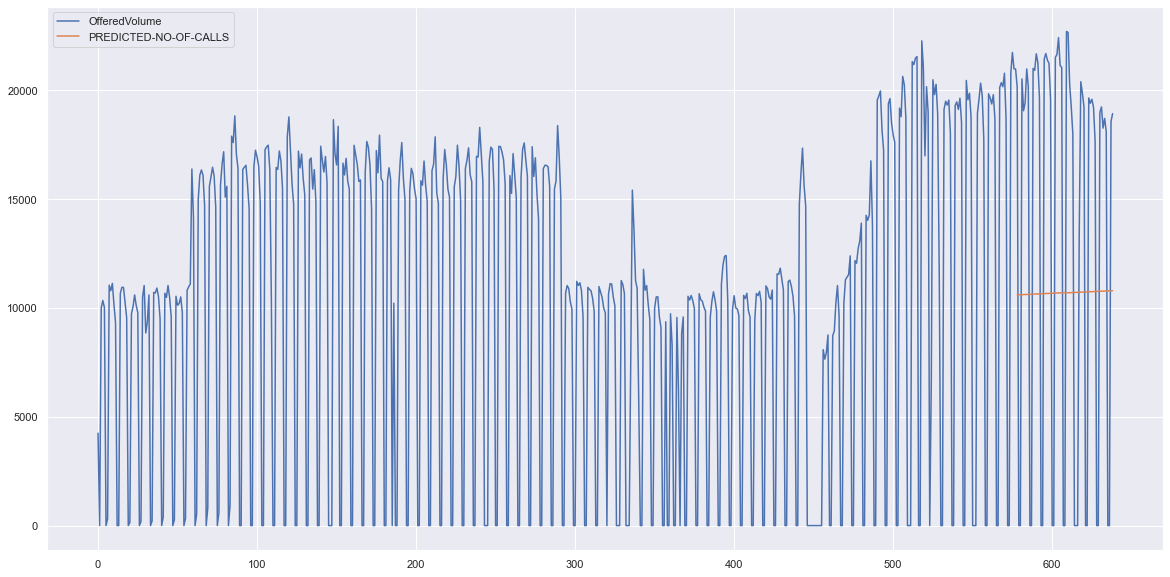

In [27]:
pd.concat([newdf['OfferedVolume'],test['PREDICTED-NO-OF-CALLS']],axis=1).plot()

In [28]:
lm.aic

11931.274200929653

In [22]:
lm.rsquared

0.9366441279253732